# Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

# Exploring Data + Changes and improvments

Due to classification problem, I'm going to train the model to predict if it's male(1) or female(0).

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Because we have some categories with String values I'm gonna switch them into numeric values, this is one of the preprocessing options.

In [3]:
df['test preparation course'] = df['test preparation course'].replace({"none": 0, "completed": 1})
df['lunch'] = df['lunch'].replace({"standard": 1, "free/reduced": 0})
df['parental level of education'] = df['parental level of education'].replace({"some college": 0, "associate's degree": 1, "high school": 2, "some high school": 3, "bachelor's degree": 4, "master's degree": 5})
df['gender'] = df['gender'].replace({"male": 1, "female": 0})
df['race/ethnicity'] = df['race/ethnicity'].replace({"group A": 1, "group B": 2, "group C": 3, "group D": 4, "group E": 5})

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,4,1,0,72,72,74
1,0,3,0,1,1,69,90,88
2,0,2,5,1,0,90,95,93
3,1,1,1,0,0,47,57,44
4,1,3,0,1,0,76,78,75


In [5]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,3.174000,1.918000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.517755,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,3.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,4.000000,3.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,5.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


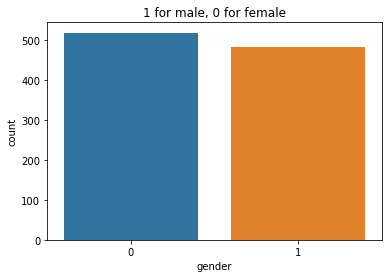

In [6]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("1 for male, 0 for female")
plt.show()

# Splitting the first data(df)

Our goal is to predict the gender so, I'll split the data to 2 different DataFrames, features(X) and because it's supervised learning we have also the label(y).

In [7]:
X = df.drop(['gender'], axis = 1)
y = df['gender']

I'm splitting the data to train and test sets but, I'm splitting the train set again to work on him only and saving the test set to check it in the end of the training.
The random state number is 42 and it means that every time we run a cell with our data so we get the validation set it means that the splitting stay the same and doesn't changed.

In [8]:
X_actual_train, X_actual_test, y_actual_train, y_actual_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_actual_train, y_actual_train, test_size = 0.2, random_state = 42)

We have 3 grades columns so we can unify them to get another column called: "avarage score", I think that it improve the data and I will check the correlation between the features to see if there is a linear correlation so we can combine some columns, I'm going to create a new Data frame with more essential columns and i will check what's better, the regular data frame or the new data frame with more features.

<AxesSubplot:>

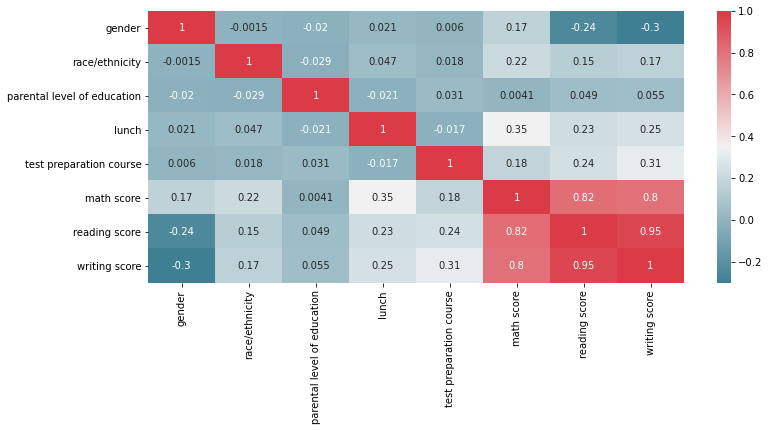

In [143]:
plt.subplots(figsize=(12,5))
corr = df.corr()
sns.heatmap(corr,annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

array([[<AxesSubplot:xlabel='race/ethnicity', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='parental level of education', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='lunch', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='test preparation course', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='reading score', ylabel='race/ethnicity'>,
        <AxesSubplot:xlabel='writing score', ylabel='race/ethnicity'>],
       [<AxesSubplot:xlabel='race/ethnicity', ylabel='parental level of education'>,
        <AxesSubplot:xlabel='parental level of education', ylabel='parental level of education'>,
        <AxesSubplot:xlabel='lunch', ylabel='parental level of education'>,
        <AxesSubplot:xlabel='test preparation course', ylabel='parental level of education'>,
        <AxesSubplot:xlabel='math score', ylabel='parental level of education'>,
        <AxesSubplot:xlabel='reading score', ylabel='p

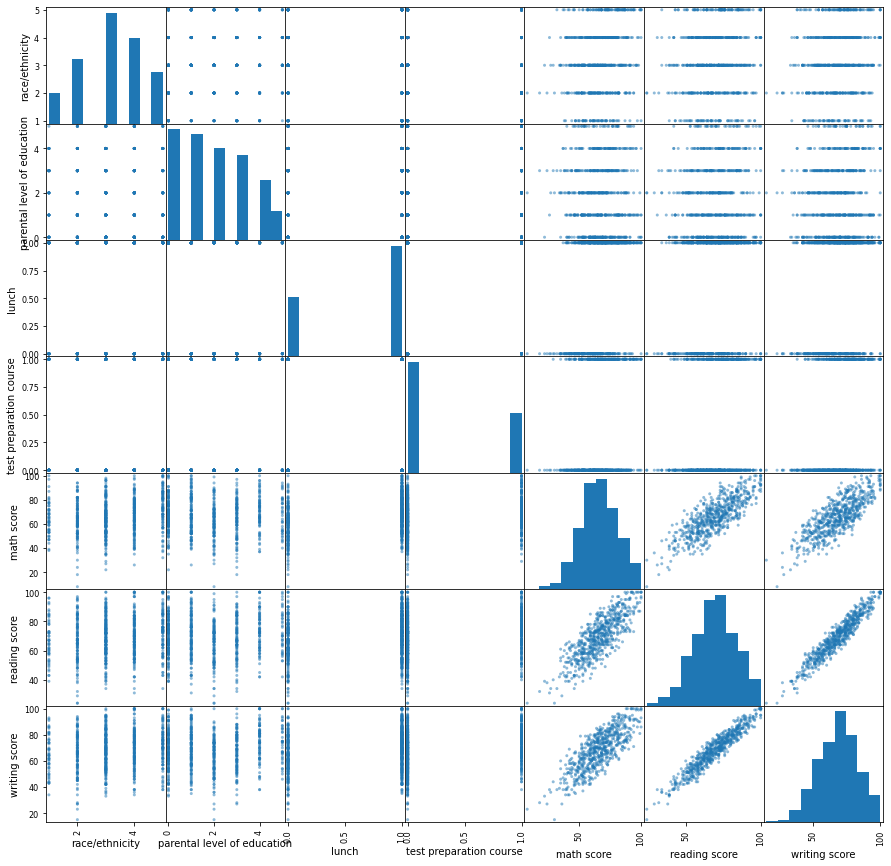

In [11]:
pd.plotting.scatter_matrix(X_train, figsize=(15, 15))

<AxesSubplot:xlabel='math score', ylabel='Density'>

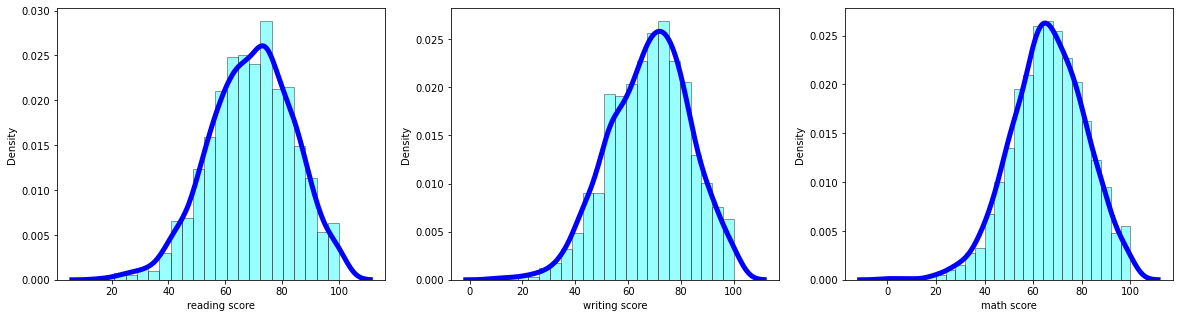

In [12]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
sns.distplot(df['reading score'], hist=True, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(df['writing score'], hist=True, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])

sns.distplot(df['math score'], hist=True, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[2])

We can see from the visualizations that there is a linear correlation between the grades and that indicates a good relationship between the features, and, there is also a logistic correlation(can view by sigmoid function) between the grades and the lunch and between the grades and test preparation course and with all this data we can add some columns.

In addition, I ploted 3 different features of grades because they are very important features for our problem and we can see that the distribution is normal and the mean grade is between 68-76 that is such a good range.

In [13]:
df2 = df.copy()
df2['avarge score'] = (df2['math score'] + df2['reading score'] + df2['writing score'])/3
df2['writing&reading_skills'] = (df2['reading score'] + df2['writing score'])/2
df2.head(n = 10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarge score,writing&reading_skills
0,0,2,4,1,0,72,72,74,72.666667,73.0
1,0,3,0,1,1,69,90,88,82.333333,89.0
2,0,2,5,1,0,90,95,93,92.666667,94.0
3,1,1,1,0,0,47,57,44,49.333333,50.5
4,1,3,0,1,0,76,78,75,76.333333,76.5
5,0,2,1,1,0,71,83,78,77.333333,80.5
6,0,2,0,1,1,88,95,92,91.666667,93.5
7,1,2,0,0,0,40,43,39,40.666667,41.0
8,1,4,2,0,1,64,64,67,65.000000,65.5
9,0,2,2,0,0,38,60,50,49.333333,55.0


# Training the models

In [260]:
knn = KNeighborsClassifier(n_neighbors = 1)
decisionTree = tree.DecisionTreeClassifier()
randomForest = RandomForestClassifier()
naiveBayes = GaussianNB()

In [261]:
knn.fit(X_train, y_train)
decisionTree.fit(X_train, y_train)
randomForest.fit(X_train, y_train)
naiveBayes.fit(X_train, y_train)

GaussianNB()

# Evaluate the data and testing the models

In [262]:
classifiers = {"knn": KNeighborsClassifier(n_neighbors = 1),
               "decisionTree": tree.DecisionTreeClassifier(),
               "randomForest": RandomForestClassifier(),
               "naiveBayes": GaussianNB()}

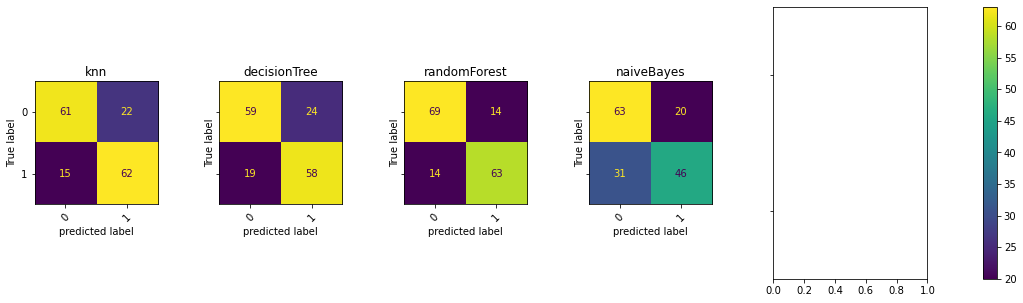

In [263]:
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('predicted label')
    disp.ax_.set_ylabel('True label')

f.colorbar(disp.im_, ax=axes)
plt.show()

We can see that in the decisionTree and randomForest models we have more False negative then False positive and for the last model, naiveBayes, we have more values in the False positive cell but, I ignore this model because as you can see it has huge number of false values and later i will show you why naiveBayes model not suitable for our problem.

These values are not constant because everytime we reactivate the models we see different values this is happend because the models choose different elemets everytime we activate them.

We can think that also the decisionTree is a bad model for us due to the numbers of the false cells but, decisionTree model can be improved by restricting the depth of the tree and more other thing so it can be improved not like naiveBayes.
In addition, the knn model can be improved too by tuning the hyperparameter(k).

So, after explaining the visualization, i will focus the three other models and, because all models with more values in the False negative cell , I'm going to select the beta element in fbeta to be 2 because when we want to minimize the False negative we need to give more weigh to the recall because, recall would be given more weight than precision in this scenario.

In [264]:
clfArr = ["knn", "decisionTree", "randomForest", "naiveBayes"]

In [265]:
count = 0
for i in [knn, decisionTree, randomForest, naiveBayes]:
    i.fit(X_train, y_train)
    y_pred_train = i.predict(X_train)
    y_pred_test = i.predict(X_test)
    print(f"The train fbeta score for {clfArr[count]} model is:", metrics.fbeta_score(y_true = y_train, y_pred = y_pred_train, beta = 2))
    print(f"The test fbets score for {clfArr[count]} model is:", metrics.fbeta_score(y_true = y_test, y_pred = y_pred_test, beta = 2))
    print()
    count = count+1

The train fbeta score for knn model is: 1.0
The test fbets score for knn model is: 0.7908163265306123

The train fbeta score for decisionTree model is: 1.0
The test fbets score for decisionTree model is: 0.7216494845360825

The train fbeta score for randomForest model is: 1.0
The test fbets score for randomForest model is: 0.8247422680412371

The train fbeta score for naiveBayes model is: 0.6574511126095751
The test fbets score for naiveBayes model is: 0.6149732620320856



In [394]:
count = 0
clf_train_scores = []
clf_test_scores = []
for i in [knn, decisionTree, randomForest, naiveBayes]:
    i.fit(X_train, y_train)
    y_pred_train = i.predict(X_train)
    y_pred_test = i.predict(X_test)
    print(f"The train Accuracy for {clfArr[count]} model is:", metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
    print(f"The test Accuracy for {clfArr[count]} model is:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test))
    print()
    if(i!=naiveBayes):
        clf_train_scores.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
        clf_test_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test))
    count = count+1

The train Accuracy for knn model is: 0.8671875
The test Accuracy for knn model is: 0.8

The train Accuracy for decisionTree model is: 1.0
The test Accuracy for decisionTree model is: 0.75

The train Accuracy for randomForest model is: 1.0
The test Accuracy for randomForest model is: 0.81875

The train Accuracy for naiveBayes model is: 0.7078125
The test Accuracy for naiveBayes model is: 0.68125



We can see that in three models we have overfitting: decisionTree and randomForest and knn this is happend because we don't restrict the depth of the tree and the num of leaf and we don't set the optimal k yet, we also can see in the ROC curve after this cell that the AUC score of decisionTree is very low in the test set, again, this is caused from the Overfitting the train set, the same thing about the randomForest model and for knn.
In this cell we checked the accuraacy in the test and train sets, I will do some changes in the elemnts of the decisionTree and randomForest and knn models but, the naiveBayes model is very disappointing in the train and in the test set. 
In addition, the AUC score for naiveBayes model is very low so the naiveBayes model doesn't appropriate for our problem.
The naiveBayes is a model that doesn't work well with variables that are interdependent but, in our data there is dependent variables such as 'lunch' and 'math score' and that sound logical because students who don't eat then don't study well.

In [153]:
y_score1 = knn.predict_proba(X_test)[:,1]
y_score2 = decisionTree.predict_proba(X_test)[:,1]
y_score3 = randomForest.predict_proba(X_test)[:,1]
y_score4 = naiveBayes.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = metrics.roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = metrics.roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = metrics.roc_curve(y_test, y_score4)

The AUC score for knn model is: 0.7700672821154749
The AUC score for decisionTree model is: 0.7501173525269911
The AUC score for randomForest model is: 0.9255202628696604
The AUC score for naiveBayes model is: 0.7505867626349554


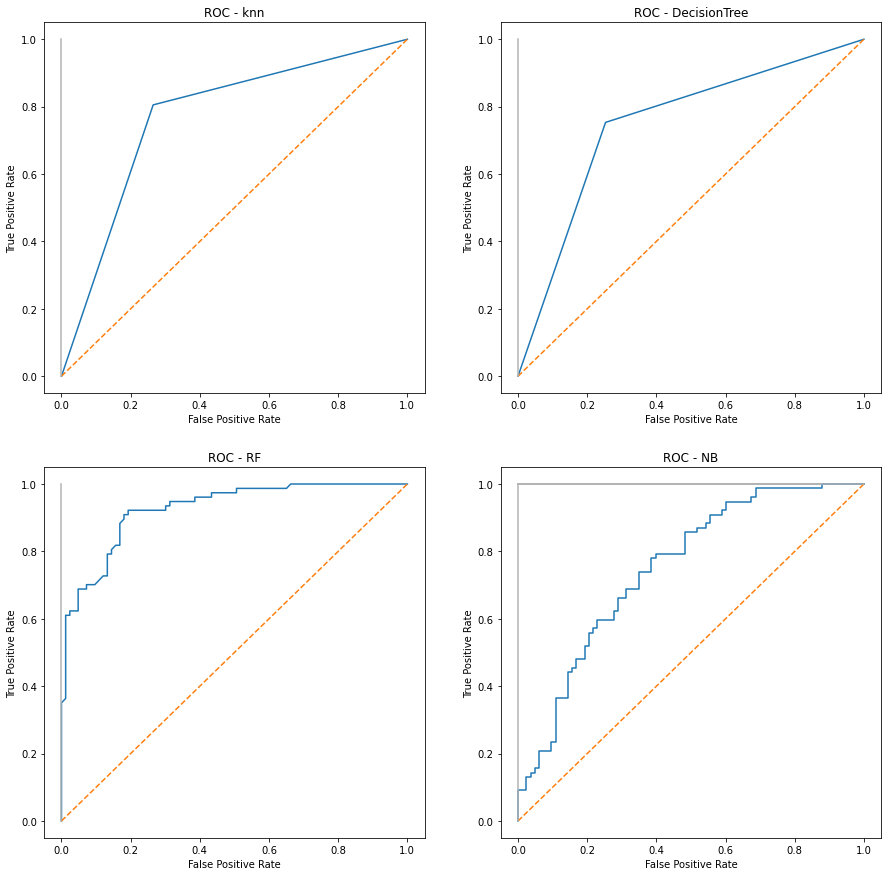

In [154]:
fig, axs = plt.subplots(2,2, figsize = (15,15))

axs[0,0].plot(false_positive_rate1, true_positive_rate1)
axs[0,0].plot([0, 1], ls="--")
axs[0,0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[0,0].set_title('ROC - knn')
axs[0,0].set_xlabel('False Positive Rate')
axs[0,0].set_ylabel('True Positive Rate')

axs[0,1].plot(false_positive_rate2, true_positive_rate2)
axs[0,1].plot([0, 1], ls="--")
axs[0,1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[0,1].set_title('ROC - DecisionTree')
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')

axs[1,0].plot(false_positive_rate3, true_positive_rate3)
axs[1,0].plot([0, 1], ls="--")
axs[1,0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[1,0].set_title('ROC - RF')
axs[1,0].set_xlabel('False Positive Rate')
axs[1,0].set_ylabel('True Positive Rate')

axs[1,1].plot(false_positive_rate4, true_positive_rate4)
axs[1,1].plot([0, 1], ls="--")
axs[1,1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
axs[1,1].set_title('ROC - NB')
axs[1,1].set_xlabel('False Positive Rate')
axs[1,1].set_ylabel('True Positive Rate')

print("The AUC score for knn model is:", metrics.roc_auc_score(y_test, y_score1))
print("The AUC score for decisionTree model is:", metrics.roc_auc_score(y_test, y_score2))
print("The AUC score for randomForest model is:", metrics.roc_auc_score(y_test, y_score3))
print("The AUC score for naiveBayes model is:", metrics.roc_auc_score(y_test, y_score4))

# Tuning the hyperparameters fpr df models

# Tuning knn model

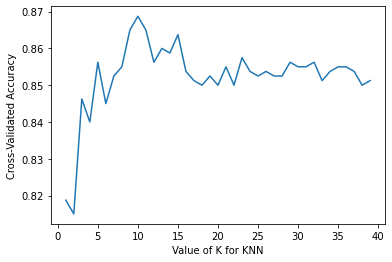

In [278]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_actual_train, y_actual_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

As we can see the best value of k for knn model is between 8-11, after 15 the accuracy score got decreased due to under-fitting.
In the next cell I will check the different accuracy scores for different values of k.

In [273]:
for k in range(1,35,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    ValScore = cross_val_score(knn, X_actual_train, y_actual_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.81875
Cross-validation score for k = 3 is: 0.8462500000000001
Cross-validation score for k = 5 is: 0.85625
Cross-validation score for k = 7 is: 0.8525
Cross-validation score for k = 9 is: 0.865
Cross-validation score for k = 11 is: 0.865
Cross-validation score for k = 13 is: 0.86
Cross-validation score for k = 15 is: 0.8637499999999999
Cross-validation score for k = 17 is: 0.85125
Cross-validation score for k = 19 is: 0.8525
Cross-validation score for k = 21 is: 0.8550000000000001
Cross-validation score for k = 23 is: 0.8574999999999999
Cross-validation score for k = 25 is: 0.8525
Cross-validation score for k = 27 is: 0.8525
Cross-validation score for k = 29 is: 0.8562500000000002
Cross-validation score for k = 31 is: 0.8550000000000001
Cross-validation score for k = 33 is: 0.85125


I intentionally checked only for odd numbers because, in knn model we usually choose an odd value of k because we don't want to compare between two classes with same elements, I explain myself:

for example, assume we chose the value of k to be 28 our question is: "is that a male or female", maybe in some points the knn model will seperate the points equally between the classes so it will be 14 to male and 14 to female and this is a big problem because the model doesn't know which class to choose.

We can see that the optimal k is when k = 9 or k = 11 to be sure what is the better I'm going to use the GredSearchCV function to check it, GridSearchCV function works similarly to cross-validation fucntion, actually this function use cross-validation to find the best parameter.
let's check it out.

In [279]:
param_dict = {"n_neighbors": range(1,35,2)}
clf = GridSearchCV(knn, param_dict, cv = 10)
clf.fit(X_actual_train, y_actual_train)
print(" best parameter set is:", clf.best_params_, " and its score was", clf.best_score_)

 best parameter set is: {'n_neighbors': 9}  and its score was 0.865


As we can see the best parameter given by GridSearchCV is k = 9 so the GridSearchCV function tells us that k = 9 is better than k = 11.

# Tuning RandomForest model

In [377]:
param_grid_random = { 
    'n_estimators': range(50,551,50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,10),
    'criterion' :['gini', 'entropy'],
    "min_samples_split": range(1,5), 
    "min_samples_leaf": range(1,5)
}

rsc = RandomizedSearchCV(randomForest, param_grid_random, n_iter = 20, cv = 10)
rsc.fit(X_actual_train, y_actual_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(50, 551, 50)})

In [379]:
param_grid_RF = { 
    'n_estimators': range(150,351,50),
    "min_samples_split": range(2,4),
    "min_samples_leaf": range(1,3),
    'max_features': ['sqrt'],
    'max_depth' : range(7,10),
    'criterion' :['entropy']
}

clf = GridSearchCV(randomForest, param_grid = param_grid_RF, cv = 10)
clf.fit(X_actual_train, y_actual_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(7, 10),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 4),
                         'n_estimators': range(150, 351, 50)})

In [380]:
print("The best parameter for randomForest model is:",clf.best_params_," and its score was",clf.best_score_)

The best parameter for randomForest model is: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 350}  and its score was 0.8612499999999998


The GridSearchCV function works very slow with many variables so I used the RandomizedSearchCV to restrict the iterations and checked the most common variables and put it in the GridSearchCV to lower the iterations and speed the code.
So, we see that the best parameters for the randomForest model give us a score of 86% which is pretty good relative to what it was before the tuning(84% approximately).

# Tuning DecisionTree model

In [352]:
param_grid_DT = { 
    'max_depth' : range(1,20),
    'criterion' :['gini', 'entropy'],
    "min_samples_split": range(1,11), 
    "min_samples_leaf": range(1,10)
}

dtc = RandomizedSearchCV(decisionTree, param_grid_DT, n_iter = 20, cv = 5)
dtc.fit(X_actual_train, y_actual_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 11)})

In [356]:
param_dict_tree = {"criterion": ['gini'], "max_depth": range(8,20), "min_samples_split": range(2,6), "min_samples_leaf": range(3,6)}
grid = GridSearchCV(decisionTree, param_grid = param_dict_tree, cv = 5)
grid.fit(X_actual_train, y_actual_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(8, 20),
                         'min_samples_leaf': range(3, 6),
                         'min_samples_split': range(2, 6)})

In [355]:
print("The best parameters for tree model is:", grid.best_params_, "and it's score was:", grid.best_score_)

The best parameters for tree model is: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 4} and it's score was: 0.85125


Again, I used the RandomizedSearchCV function to run random elements for the decisionTree model and run the GridSearchCV faster.
We can see a significant change between the accuracy now(85%) and the accuracy in the beginning-before the tuning(75% approximately), 10% improvement!.

After we saw the best hyperparameters for all models we can now create a new tuning classifiers with the best parameters and later I will compare between the models to see who is the best model.

# Creating new tuning models with the best hyperparameters

In [385]:
tune_knn = KNeighborsClassifier(n_neighbors = 9)
tune_randomForest = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 3, n_estimators = 350)
tune_decisionTree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 14, min_samples_leaf = 3, min_samples_split = 4)

In [386]:
tuneClf = ['tune_knn', 'tune_decisionTree', 'tune_randomForest']

In [388]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in [tune_knn, tune_decisionTree, tune_randomForest]:
    i.fit(X_train, y_train)
    y_pred_train_tune = i.predict(X_train)
    y_pred_test_tune = i.predict(X_test)
    print(f"The train Accuracy for {tuneClf[count]} model is:", metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
    print(f"The test Accuracy for {tuneClf[count]} model is:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
    print()
    tune_train_scores.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
    tune_test_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
    count = count+1

The train Accuracy for tune_knn model is: 0.8890625
The test Accuracy for tune_knn model is: 0.83125

The train Accuracy for tune_decisionTree model is: 0.9390625
The test Accuracy for tune_decisionTree model is: 0.8

The train Accuracy for tune_randomForest model is: 0.9875
The test Accuracy for tune_randomForest model is: 0.825



# Comparing df-models to dummy model + visualization

In [389]:
train_dummy_scores = []
test_dummy_scores = []
strategies = ['most_frequent', 'stratified', 'uniform']

for i in strategies:
    clf_dummy = DummyClassifier(strategy = i, random_state=42) 
    clf_dummy.fit(X_train, y_train)
    y_pred_dummy_train = clf_dummy.predict(X_train)
    y_pred_dummy_test = clf_dummy.predict(X_test)
    train_accuracy = metrics.accuracy_score(y_true = y_train, y_pred = y_pred_dummy_train)
    test_accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_dummy_test)
    train_dummy_scores.append(train_accuracy)
    test_dummy_scores.append(test_accuracy)

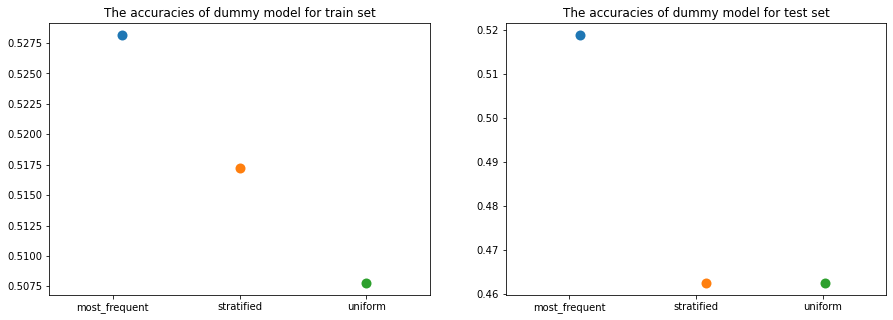

In [390]:
f, axes = plt.subplots(1,2, figsize = (15,5))
sns.stripplot(strategies, train_dummy_scores,size = 10, ax = axes[0])
axes[0].set_title("The accuracies of dummy model for train set")
sns.stripplot(strategies, test_dummy_scores,size = 10, ax = axes[1])
axes[1].set_title("The accuracies of dummy model for test set")
plt.show()

The best accuracy score in dummy model is a little bit above 0.5275 and all my models have a accuracy more than 0.7 so all my models pass the accuracy of the dummy model.

In [391]:
Clf_name = ['knn', 'decisionTree', 'randomForest']
#The accuracy scores before the improvement
clf_train_scores
clf_test_scores
#The accuracy scores after the improvement
tune_train_scores
tune_test_scores

[0.83125, 0.8, 0.825]

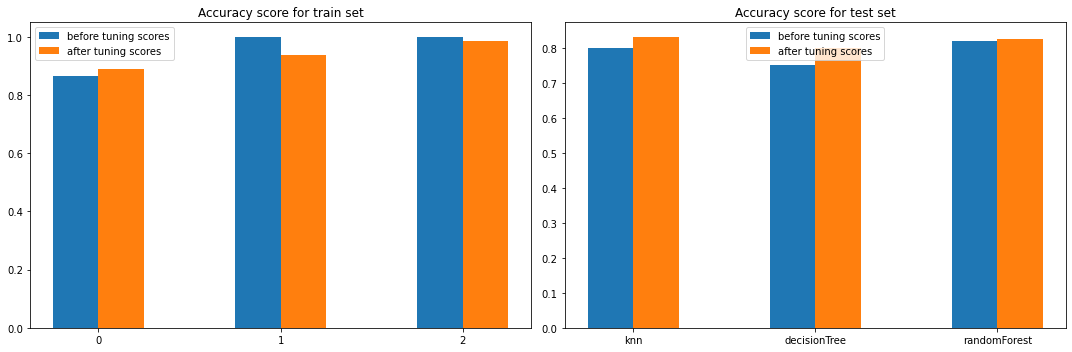

In [395]:
import matplotlib
figure, axes = plt.subplots(1,2, figsize = (15,5))
x = np.arange(len(Clf_name))
w = 0.25

axes[0].bar(x - w/2, clf_train_scores, w, label = "before tuning scores")
axes[0].bar(x + w/2, tune_train_scores, w, label = "after tuning scores")
axes[0].set_title("Accuracy score for train set")
axes[0].legend()

axes[1].bar(x - w/2, clf_test_scores, w, label = "before tuning scores")
axes[1].bar(x + w/2, tune_test_scores, w, label = "after tuning scores")
axes[1].set_title("Accuracy score for test set")
axes[1].legend()

figure.tight_layout()
plt.xticks(x, Clf_name)
axes[0].set_xticks(x)
axes[1].set_xticks(x,Clf_name)
plt.show()

As we can see, in the train set the accuracy before tuning is better than the accuracy after the tuning and this is good for us, why you asking?, because Usually when a model has a very high accuracy score in the train set is not so good in it's called: "Overfitting" but now we reduced a little bit the accuracy score in the train set bet improve the accuracy in the test set and this is important to us.
The test set is a set that the model does not really know about it, we do not reveal to the model anything about the test set so if the models improves the performance in this set then the models themself have improved.

# Working on the second DataFrame(df2)

In [396]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarge score,writing&reading_skills
0,0,2,4,1,0,72,72,74,72.666667,73.0
1,0,3,0,1,1,69,90,88,82.333333,89.0
2,0,2,5,1,0,90,95,93,92.666667,94.0
3,1,1,1,0,0,47,57,44,49.333333,50.5
4,1,3,0,1,0,76,78,75,76.333333,76.5


In [397]:
df2.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarge score,writing&reading_skills
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,3.174000,1.918000,0.645000,0.358000,66.08900,69.169000,68.054000,67.770667,68.611500
std,0.499926,1.157179,1.517755,0.478753,0.479652,15.16308,14.600192,15.195657,14.257326,14.727923
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,9.000000,13.500000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,58.333333,58.500000
50%,0.000000,3.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000,68.333333,69.500000
75%,1.000000,4.000000,3.000000,1.000000,1.000000,77.00000,79.000000,79.000000,77.666667,79.000000
max,1.000000,5.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:>

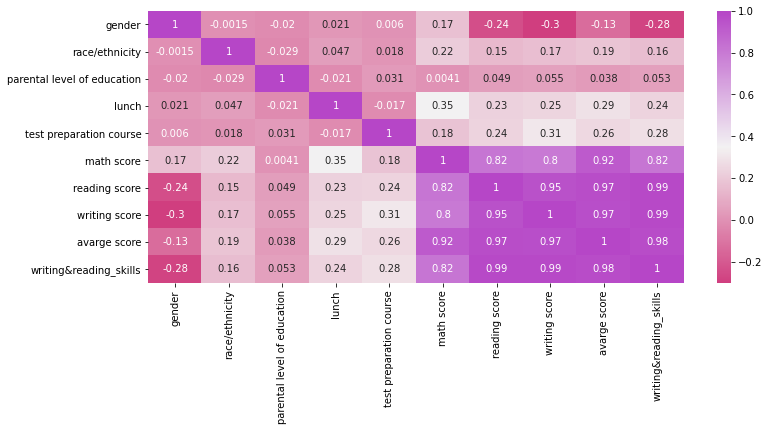

In [398]:
plt.subplots(figsize=(12,5))
sns.heatmap(df2.corr(), annot = True, cmap=sns.diverging_palette(350, 300, as_cmap=True))

# Splitting the data

In [66]:
X2 = df2.drop(['gender'], axis = 1)
y2 = df2['gender']

In [70]:
X_actual_train2, X_actual_test2, y_actual_train2, y_actual_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_actual_train2, y_actual_train2, test_size = 0.2, random_state = 42)

I omitted the Naive Bayes model because as I said in the beginning, the Naive Bayes model is not good for our problem, his accuracy scores are very low.


In [73]:
knn2 = KNeighborsClassifier()
decisionTree2 = tree.DecisionTreeClassifier()
randomForest2 = RandomForestClassifier()

In [230]:
clfArr2 = ["knn2", "decisionTree2", "randomForest2"]

In [473]:
count2 = 0
for i in [knn2, decisionTree2, randomForest2]:
    i.fit(X_train2, y_train2)
    y_pred_train2 = i.predict(X_train2)
    y_pred_test2 = i.predict(X_test2)
    print(f"The train Accuracy before tuning for {clfArr2[count2]} model is:", metrics.accuracy_score(y_true = y_train2, y_pred = y_pred_train2))
    print(f"The test Accuracy before tuning for {clfArr2[count2]} model is:", metrics.accuracy_score(y_true = y_test2, y_pred = y_pred_test2))
    print()
    count2 = count2+1

The train Accuracy before tuning for knn2 model is: 0.8625
The test Accuracy before tuning for knn2 model is: 0.80625

The train Accuracy before tuning for decisionTree2 model is: 1.0
The test Accuracy before tuning for decisionTree2 model is: 0.73125

The train Accuracy before tuning for randomForest2 model is: 1.0
The test Accuracy before tuning for randomForest2 model is: 0.825



# Tuning the hyperparameters for df2 models

# Tuning knn model

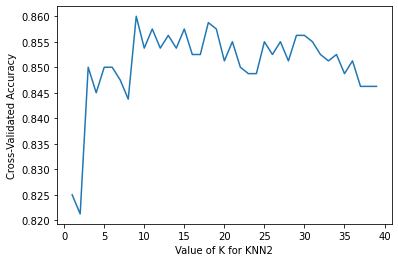

In [409]:
k2_range = range(1, 40)
k2_scores = []

for k in k2_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn2, X_actual_train2, y_actual_train2, cv=10, scoring='accuracy')
    k2_scores.append(scores.mean())

plt.plot(k2_range, k2_scores)
plt.xlabel('Value of K for KNN2')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [410]:
for k in range(1,30,2):
    knn2 = KNeighborsClassifier(n_neighbors = k)
    ValScore2 = cross_val_score(knn2, X_actual_train2, y_actual_train2, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore2)

Cross-validation score for k = 1 is: 0.825
Cross-validation score for k = 3 is: 0.85
Cross-validation score for k = 5 is: 0.85
Cross-validation score for k = 7 is: 0.8475000000000001
Cross-validation score for k = 9 is: 0.86
Cross-validation score for k = 11 is: 0.8574999999999999
Cross-validation score for k = 13 is: 0.85625
Cross-validation score for k = 15 is: 0.8574999999999999
Cross-validation score for k = 17 is: 0.8525
Cross-validation score for k = 19 is: 0.8575000000000002
Cross-validation score for k = 21 is: 0.8550000000000001
Cross-validation score for k = 23 is: 0.8487500000000001
Cross-validation score for k = 25 is: 0.8549999999999999
Cross-validation score for k = 27 is: 0.8550000000000001
Cross-validation score for k = 29 is: 0.85625


In [416]:
param_dict = {"n_neighbors": range(1,30,2)}
clf = GridSearchCV(knn2, param_dict, cv =10)
clf.fit(X_actual_train2, y_actual_train2)
print(" best parameter set is:", clf.best_params_, " and its score was", clf.best_score_)

 best parameter set is: {'n_neighbors': 9}  and its score was 0.86


# Tuning RandomForest model

In [465]:
param_dict_random = { 
    'n_estimators': range(50,351,50),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(3,10),
    'criterion' :['entropy'],
    "min_samples_split": range(3,5), 
    "min_samples_leaf": range(2,5)
}

rsc2 = RandomizedSearchCV(randomForest2, param_dict_random, n_iter = 20, cv = 5)
rsc2.fit(X_actual_train2, y_actual_train2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': range(3, 10),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(2, 5),
                                        'min_samples_split': range(3, 5),
                                        'n_estimators': range(50, 351, 50)})

In [439]:
param_dict_RF = { 
    'n_estimators': range(50,351,50),
    "min_samples_split": range(2,4),
    "min_samples_leaf": range(1,4),
    'max_features': ['log2'],
    'max_depth' : range(6,9),
    'criterion' :['gini', 'entropy']
}

clf2 = GridSearchCV(randomForest2, param_grid = param_dict_RF, cv = 5)
clf2.fit(X_actual_train2, y_actual_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 9), 'max_features': ['log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 4),
                         'n_estimators': range(50, 351, 50)})

In [440]:
print("The best parameter for randomForest model is:",clf2.best_params_," and its score was",clf2.best_score_)

The best parameter for randomForest model is: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}  and its score was 0.8612500000000001


# Tuning DecisionTree model

In [436]:
param_grid_DT = { 
    'max_depth' : range(1,20),
    'criterion' :['gini', 'entropy'],
    "min_samples_split": range(1,11), 
    "min_samples_leaf": range(1,10)
}

dtc2 = RandomizedSearchCV(decisionTree2, param_grid_DT, n_iter = 250, cv = 10)
dtc2.fit(X_actual_train2, y_actual_train2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=250,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 11)})

In [429]:
param_dict_tree = {"criterion": ['gini', 'entropy'], "max_depth": range(10,15), "min_samples_split": range(3,10), "min_samples_leaf": range(3,10)}
grid2 = GridSearchCV(decisionTree2, param_grid = param_dict_tree, cv = 10)
grid2.fit(X_actual_train2, y_actual_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(3, 10),
                         'min_samples_split': range(3, 10)})

In [430]:
print("The best parameters for tree model is:", grid2.best_params_, "and it's score was:", grid2.best_score_)

The best parameters for tree model is: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 3} and it's score was: 0.8546875


In [468]:
tune_knn2 = KNeighborsClassifier(n_neighbors = 9)
tune_decisionTree2 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 12, min_samples_leaf = 7, min_samples_split = 3)
tune_randomForest2 = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3,n_estimators = 50)

In [469]:
counter = 0
clf_tune_train_scores2 = []
clf_tune_test_scores2 = []
for i in [tune_knn2, tune_decisionTree2, tune_randomForest2]:
    i.fit(X_train2, y_train2)
    y_pred_tune_train2 = i.predict(X_train2)
    y_pred_tune_test2 = i.predict(X_test2)
    print(f"The train Accuracy after tuning for {clfArr2[counter]} model is:", metrics.accuracy_score(y_true = y_train2, y_pred = y_pred_train2))
    print(f"The test Accuracy after tuning for {clfArr2[counter]} model is:", metrics.accuracy_score(y_true = y_test2, y_pred = y_pred_test2))
    print()
    clf_tune_train_scores2.append(metrics.accuracy_score(y_true = y_train2, y_pred = y_pred_tune_train2))
    clf_tune_test_scores2.append(metrics.accuracy_score(y_true = y_test2, y_pred = y_pred_tune_test2))
    counter = counter+1

The train Accuracy for knn2 model is: 0.8859375
The test Accuracy for knn2 model is: 0.825

The train Accuracy for decisionTree2 model is: 0.9046875
The test Accuracy for decisionTree2 model is: 0.79375

The train Accuracy for randomForest2 model is: 0.953125
The test Accuracy for randomForest2 model is: 0.8125



# Comparing between the accuracies of df and df2

In [498]:
# df accuracies
tune_train_scores
tune_test_scores

# df2 accuracies
clf_tune_train_scores2
clf_tune_test_scores2

# models names
names = ['KNN', 'DecisionTree', 'RandomForest']

# count wins
count1 = 0
count2 = 0

for i in range(3):
    if(tune_train_scores[i]>clf_tune_train_scores2[i]):
        print(colored("In the train set:", 'green'))
        print(f"df accuracy more than df2 accuracy in {names[i]} model and his score is:", round(tune_train_scores[i]*100), "%")
        count1+=1
    else:
        print(colored("In the train set:", 'green'))
        print(f"df2 accuracy more than df accuracy in {names[i]} model and his score is:", round(clf_tune_train_scores2[i]*100), "%")
        count2+=1
    if(tune_test_scores[i]>clf_tune_test_scores2[i]):
        print(colored("In the test set:", 'blue'))
        print(f"df accuracy more than df2 accuracy in {names[i]} model and his score is:", round(tune_test_scores[i]*100), "%")
        count1+=1
    else:
        print(colored("In the test set:", 'blue'))
        print(f"df2 accuracy more than df accuracy in {names[i]} model and his score is:", round(clf_tune_test_scores2[i]*100), "%")
        count2+=1
    print("---------------------------------------------------------------------------------------")
if(count1>count2):
    print(colored("The winner is: df", 'cyan'))
else:
    print(colored("the winner is: df2", 'cyan'))

In the train set:
df accuracy more than df2 accuracy in KNN model and his score is: 89 %
In the test set:
df accuracy more than df2 accuracy in KNN model and his score is: 83 %
---------------------------------------------------------------------------------------
In the train set:
df accuracy more than df2 accuracy in DecisionTree model and his score is: 94 %
In the test set:
df accuracy more than df2 accuracy in DecisionTree model and his score is: 80 %
---------------------------------------------------------------------------------------
In the train set:
df accuracy more than df2 accuracy in RandomForest model and his score is: 99 %
In the test set:
df accuracy more than df2 accuracy in RandomForest model and his score is: 82 %
---------------------------------------------------------------------------------------
The winner is: df


# Choosing the best model by cross-validation

In [504]:
KNN = KNeighborsClassifier(n_neighbors = 9)
DecisionTree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 14, min_samples_leaf = 3, min_samples_split = 4)
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 3, n_estimators = 350)

In [508]:
print("KNN score:", cross_val_score(KNN, X_actual_train, y_actual_train, cv=10, scoring='accuracy').mean())
print("DecisionTree score:", cross_val_score(DecisionTree, X_actual_train, y_actual_train, cv=10, scoring='accuracy').mean())
print("RandomForest score:", cross_val_score(RandomForest, X_actual_train, y_actual_train, cv=10, scoring='accuracy').mean())

KNN score: 0.865
DecisionTree score: 0.8299999999999998
RandomForest score: 0.85875


# Predicting the test set

As we can see the knn model perform the best score so we choose this model to predict the test set.

In [509]:
KNN.fit(X_actual_train, y_actual_train)

KNeighborsClassifier(n_neighbors=9)

In [510]:
final_pred = KNN.predict(X_actual_test)

In [516]:
final_accuracy_score = round((metrics.accuracy_score(y_true = y_actual_test, y_pred = final_pred)*100))
final_accuracy_score

90

In [525]:
print(colored(f"The knn model accuracy score in the test set is:{final_accuracy_score}%", 'green'))

The knn model accuracy score in the test set is:90%
